In [ ]:
out_name = "timeframe_2019"
start_date = "2019-01-01"
end_date = "2020-01-01"

d:\stock-market-crisis-analysis\combine_all_nse.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df.reset_index(inplace=True)


In [ ]:
from combine_all_nse import combine_csv
combine_csv(out_name = out_name, start_date = start_date, end_date = end_date)

In [2]:
from preprocessing import preprocess
preprocess(out_name)
cleaned_name = out_name + "_cleaned"

In [3]:
from adjacency_matrix import build_adjaceny_matrix
build_adjaceny_matrix(cleaned_name, threshold=0.9)
adj_path = "adj/" + cleaned_name + ".csv"

In [4]:
from plot_graph import *
G = create_graph_from_adjacency(adj_path)

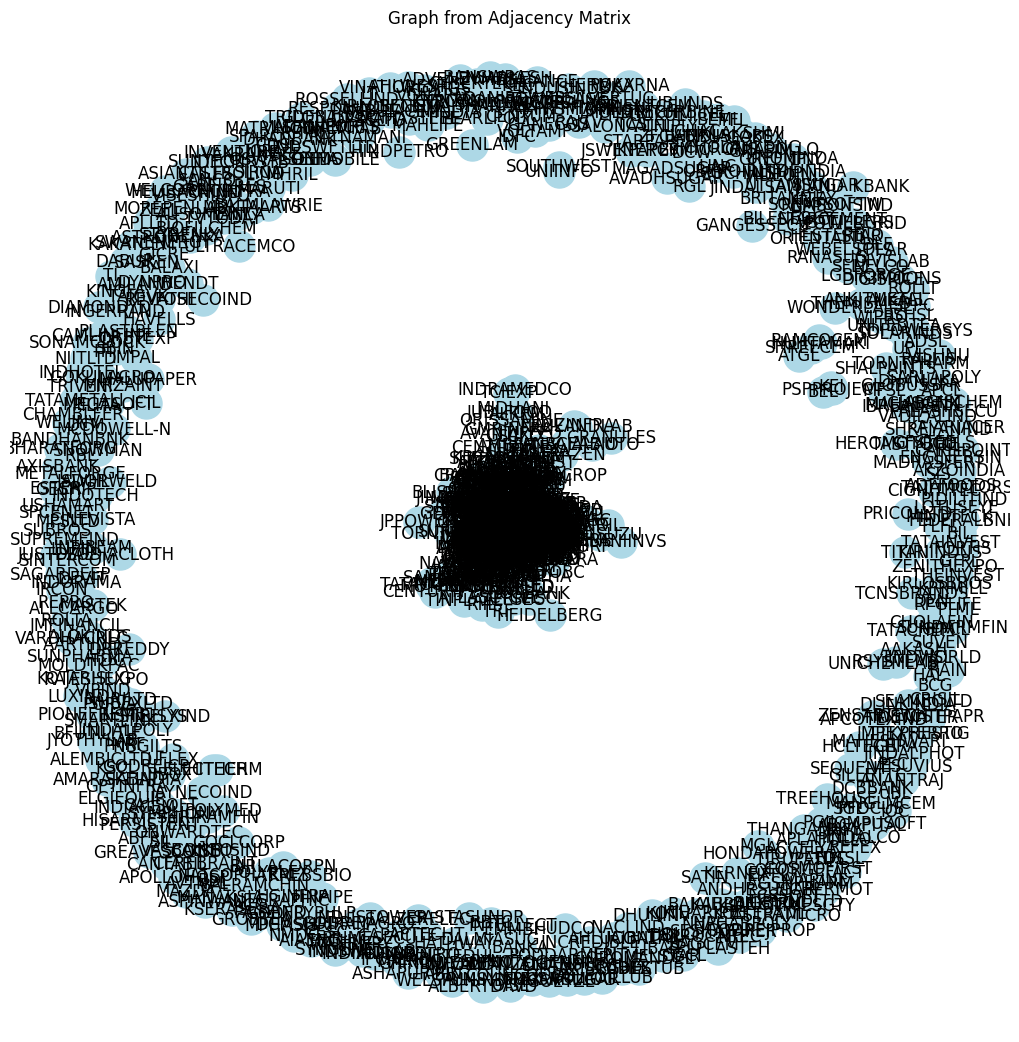

In [5]:
plot_graph(G)

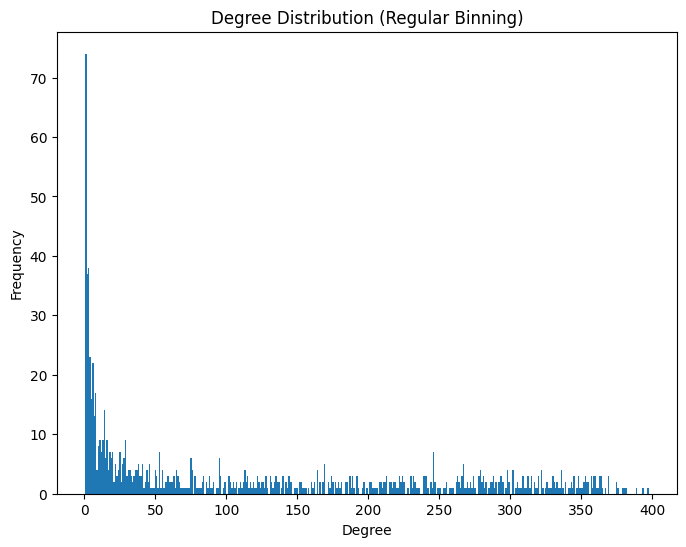

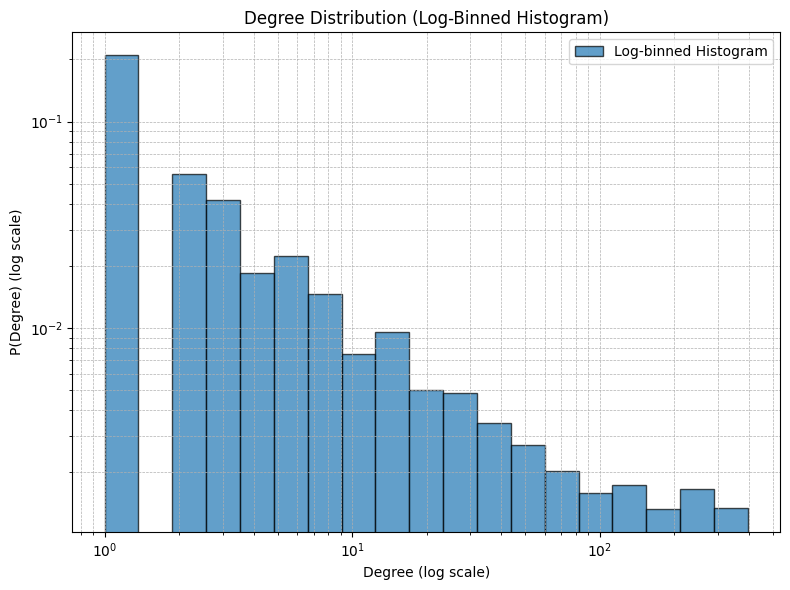

In [6]:
from degree_analysis import plot_degree_dist
plot_degree_dist(G)

In [7]:
from cluster_coeff import *
global_clustering, random_clustering = get_cluster_coeff(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")

Global Clustering Coefficient (Transitivity): 0.6457
Random Graph Clustering Coefficient: 0.0545



📊 Top 10 Nodes by Degree - Clustering Coefficients:
         Node  Degree  Local Clustering Coef
0    SREINFRA     397               0.547197
1      ELECON     394               0.539363
2    GALLANTT     393               0.552825
3   BALPHARMA     389               0.560968
4   MAYURUNIQ     382               0.555895
5       ZUARI     381               0.559677
6        ABAN     380               0.543175
7     ATLANTA     379               0.553727
8        SPTL     376               0.569135
9  HITECHGEAR     375               0.585554


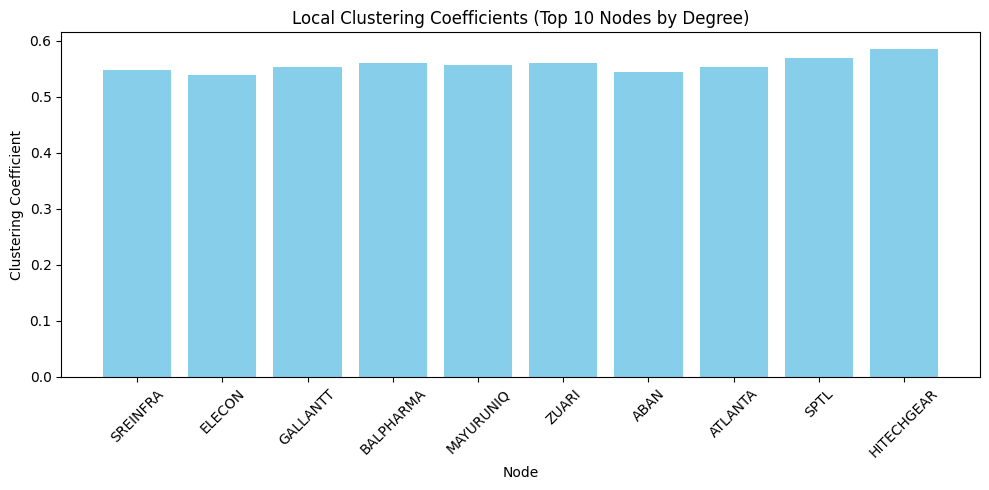

In [8]:
# plotting clustering coefficients of top 10 nodes by degree
plot_cluster_coefficient(G)

In [9]:
from communities import community_detection
partition, modularity, num_communities = community_detection(G)
print(f"Number of communities: {num_communities}")
print(f"Modularity score: {modularity:.4f}")

Number of communities: 510
Modularity score: 0.2163


In [10]:
### OPTIONAL #####
from collections import Counter
community_sizes = Counter(partition.values())
print("Community sizes:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes")

Community sizes:
Community 0: 1 nodes
Community 1: 372 nodes
Community 2: 1 nodes
Community 3: 1 nodes
Community 4: 1 nodes
Community 5: 4 nodes
Community 6: 1 nodes
Community 7: 350 nodes
Community 8: 1 nodes
Community 9: 1 nodes
Community 10: 1 nodes
Community 11: 1 nodes
Community 12: 1 nodes
Community 13: 1 nodes
Community 14: 154 nodes
Community 15: 1 nodes
Community 16: 1 nodes
Community 17: 1 nodes
Community 18: 1 nodes
Community 19: 1 nodes
Community 20: 1 nodes
Community 21: 1 nodes
Community 22: 1 nodes
Community 23: 1 nodes
Community 24: 1 nodes
Community 25: 1 nodes
Community 26: 1 nodes
Community 27: 1 nodes
Community 28: 1 nodes
Community 29: 1 nodes
Community 30: 1 nodes
Community 31: 1 nodes
Community 32: 1 nodes
Community 33: 1 nodes
Community 34: 1 nodes
Community 35: 1 nodes
Community 36: 1 nodes
Community 37: 1 nodes
Community 38: 1 nodes
Community 39: 1 nodes
Community 40: 2 nodes
Community 41: 24 nodes
Community 42: 1 nodes
Community 43: 1 nodes
Community 44: 1 no

In [11]:
from centralities import *
k = 3 # number of nodes to be extracted from the top and bottom of centralities scores
top_nodes = get_top_nodes_by_centrality(G,k)
bottom_nodes = get_bottom_nodes_by_centrality(G,k)

In [12]:
from shockwave import build_graph_from_correlation_csv
corr_path = "adj/" + cleaned_name + ".csv"
G_corr = build_graph_from_correlation_csv(corr_path)

In [13]:
from simulation_shock import *
initial_shock = -0.05
steps = 4
decay = 0.2
simulate_shocks_from_top_central_nodes(G_corr,top_nodes,initial_shock=initial_shock, steps=steps, decay=decay)
simulate_shocks_from_bottom_central_nodes(G_corr,bottom_nodes,initial_shock=initial_shock, steps=steps, decay=decay)


🚨 Simulating shock from top 1 Closeness node: SREINFRA
🔻 Number of stocks that fell: 906
🔺 Stocks that rose: []
📉 Total network shock: -539595.0900

🚨 Simulating shock from top 2 Closeness node: ZUARIIND
🔻 Number of stocks that fell: 909
🔺 Stocks that rose: []
📉 Total network shock: -490935.7707

🚨 Simulating shock from top 3 Closeness node: SIMPLEXINF
🔻 Number of stocks that fell: 908
🔺 Stocks that rose: []
📉 Total network shock: -493030.2725

🚨 Simulating shock from top 1 Betweenness node: BERGEPAINT
🔻 Number of stocks that fell: 881
🔺 Stocks that rose: []
📉 Total network shock: -2976.8986

🚨 Simulating shock from top 2 Betweenness node: ENIL
🔻 Number of stocks that fell: 907
🔺 Stocks that rose: []
📉 Total network shock: -350018.3566

🚨 Simulating shock from top 3 Betweenness node: INDOSTAR
🔻 Number of stocks that fell: 891
🔺 Stocks that rose: []
📉 Total network shock: -14989.6112

🚨 Simulating shock from top 1 Eigenvector node: SREINFRA
🔻 Number of stocks that fell: 906
🔺 Stocks th